# Numpy基础：数组和矢量运算

## 1.NumPy的ndarray：一种多维数组对象

引入numpy,生成一个包含随机数据的小数组

In [3]:
import numpy as np

data = np.random.randn(2, 3)
data

array([[ 0.8167287 ,  1.2907395 ,  0.83440763],
       [ 0.12777959,  0.74369236, -1.07226754]])

然后进行数学运算

In [6]:
data * 10

array([[  8.16728696,  12.907395  ,   8.34407631],
       [  1.27779595,   7.43692364, -10.72267542]])

In [8]:
data + data

array([[ 1.63345739,  2.581479  ,  1.66881526],
       [ 0.25555919,  1.48738473, -2.14453508]])

ndarray是一个通用同构数据多维容器，其中所有元素必须是相同类型，每个数组都有一个shape和一个dtype

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

### 创建ndarray

array函数接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的Numpy数据，以一个列表转换为例：

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列将会被转换为一个多维数组

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

data2是列表的列表，arr2的两个维度的shape是从data2引入的，可以用属性ndim和shape验证

In [14]:
arr2.ndim

2

In [15]:
arr2.shape

(2, 4)

除了np.array之外，还有一些函数可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体数值的数组。

In [16]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2))
#默认返回全0不安全，所以返回了一堆垃圾值

array([[[7.37851853e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [2.67026009e-307, 4.42434924e-062]],

       [[7.86922975e-071, 1.77077185e-051],
        [5.26604177e-037, 6.13147062e-062],
        [1.73734862e-047, 2.38485905e+180]]])

arange是python内置函数range的数组版

In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

表1-1列出了一些数组创建函数，numpy默认数据类型是float64

| 函数 | 说明 |
| :------ | :------ |
| array | 将输入数据（列表、元组、数组或其他序列类型）转换为ndarray |
| asarray | 将输入转换为ndarray，如果输入本身就是一个ndarray就不进行复制 |
| arange | 类似于内置的range，但返回的是一个ndarray而不是列表 |
| ones,ones_like | 根据指定的形状和dtype创建一个全1数组。one_like以另一个数组为参数，并根据其形状和dtype创建一个全1数组 |
| zeros,zeros_like | 类似于ones和ones_like |
| empty,empty_like | 类似于ones和ones_like |
| full,full_like | 用fill value中的所有值 |
| eye,identity | 创建一个正方的NxN单位矩阵 |

### ndarray的数据类型

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1

array([1., 2., 3.])

In [22]:
arr2

array([1, 2, 3])

可以通过ndarray的astype方法明确的将一个数组从一个dtype转换成另一个dtype:

In [23]:
arr = np.array([1, 2, 3])
arr.dtype

dtype('int32')

In [24]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

如果某字符串表示的全是数字，也可以用astype将其转换为数值形式：

In [25]:
nstr = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
nstr.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Numpy数组的运算

大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [26]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [27]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [28]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

数组与标量的算术运算会将标量值传播到各个元素：

In [29]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [30]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

大小相同的数组之间的比较会生成布尔值数组：

In [31]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [32]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### 基本的索引和切片

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多：

In [34]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
arr[5]

5

In [36]:
arr[5:8]

array([5, 6, 7])

In [37]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**数组切片是原始数据的视图，这意味着数据不会被复制**
举个例子：

In [38]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

现在，修改arr_slice中的值，变动也会体现在原始数组arr中：

In [39]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

切片[ : ]会给数组中的所有值赋值：

In [40]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [41]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [42]:
arr2d[0][2]

3

In [43]:
arr2d[0, 2]

3

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。因此，在2×2×3数组arr3d中：

In [44]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0]是一个2×3数组：

In [45]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

### 切片索引

ndarray的切片语法和python列表的一维对象类似：

In [48]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [49]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

对于之前的二维数组arr2d，切片方式稍显不同：

In [50]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

**可以一次传入多个切片，就像传入多个索引**

In [52]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

选取第二行的前两列：

In [53]:
arr2d[1, :2]

array([4, 5])

只有冒号表示选择整个轴：

In [54]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

对切片表达式的赋值也会扩散到整个选区：

In [55]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

假设有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。使用numpy.random中的randn生成一些正态分布的随机数据：

In [56]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [57]:
data

array([[-0.89425599, -0.93336421, -0.92754204, -0.20849107],
       [ 0.7878771 , -0.31871084, -0.76989688, -0.36109827],
       [-1.49673434,  0.29203812, -0.56339619, -0.13646575],
       [ 0.95038645, -0.70899407, -0.98871819, -0.36690628],
       [-1.41228778,  0.25936287, -1.58148557,  0.14815141],
       [-1.37106856, -0.00500151, -0.90761552, -0.46649736],
       [-0.48895028,  0.03634853,  0.80654714, -0.90349741]])

假设每个名字都对应data数组中的一行，想要选出对应名字'Bob'的所有行。跟算术运算一样，数组的比较运算也是矢量化的。因此，对names和字符串"Bob"的比较运算将会产生一个布尔型数组：

In [58]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

这个布尔型数组可用于数组索引：

In [59]:
data[names == 'Bob']

array([[-0.89425599, -0.93336421, -0.92754204, -0.20849107],
       [ 0.95038645, -0.70899407, -0.98871819, -0.36690628]])

布尔型数组的长度必须跟被索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用:下面例子选取了**names == 'Bob'**的行，并索引了列：

In [60]:
data[names == 'Bob', 2:]

array([[-0.92754204, -0.20849107],
       [-0.98871819, -0.36690628]])

In [61]:
data[names == 'Bob', 3]

array([-0.20849107, -0.36690628])

要选择除"Bob"以外的其他值，既可以使用不等于符号（!=），也可以通过~对条件进行否定：

In [63]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [64]:
data[names != 'Bob']

array([[ 0.7878771 , -0.31871084, -0.76989688, -0.36109827],
       [-1.49673434,  0.29203812, -0.56339619, -0.13646575],
       [-1.41228778,  0.25936287, -1.58148557,  0.14815141],
       [-1.37106856, -0.00500151, -0.90761552, -0.46649736],
       [-0.48895028,  0.03634853,  0.80654714, -0.90349741]])

~操作符用来反转条件很好用：

In [65]:
cond = names == 'Bob'
data[~cond]

array([[ 0.7878771 , -0.31871084, -0.76989688, -0.36109827],
       [-1.49673434,  0.29203812, -0.56339619, -0.13646575],
       [-1.41228778,  0.25936287, -1.58148557,  0.14815141],
       [-1.37106856, -0.00500151, -0.90761552, -0.46649736],
       [-0.48895028,  0.03634853,  0.80654714, -0.90349741]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可：

In [66]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [67]:
data[mask]

array([[-0.89425599, -0.93336421, -0.92754204, -0.20849107],
       [-1.49673434,  0.29203812, -0.56339619, -0.13646575],
       [ 0.95038645, -0.70899407, -0.98871819, -0.36690628],
       [-1.41228778,  0.25936287, -1.58148557,  0.14815141]])

**通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。**

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需：

In [69]:
data[data<0] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.7878771 , 0.        , 0.        , 0.        ],
       [0.        , 0.29203812, 0.        , 0.        ],
       [0.95038645, 0.        , 0.        , 0.        ],
       [0.        , 0.25936287, 0.        , 0.14815141],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.03634853, 0.80654714, 0.        ]])

通过一维布尔数组设置整行或列的值也很简单：

In [70]:
data[names != "Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.7878771 , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.03634853, 0.80654714, 0.        ]])

### 花式索引

花式索引指利用整数数组进行索引，假设有一个8 * 4数组：

In [2]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：

In [4]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行：

In [5]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会返回一个一维数组，其中的元素对应各个索引元组：

In [7]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [8]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

这个花式索引的行为可能会跟某些用户的预期不一样（包括我在内），选取矩阵的行列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法：

In [9]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**记住，花式索引跟切片不一样，它总是将数据复制到新数组中。**

### 数轴转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [10]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [12]:
arr = np.random.randn(6, 3)
arr

array([[-1.03178103, -0.8030686 ,  0.32200342],
       [-0.62014269,  1.22096002, -1.56583766],
       [-0.88118874,  0.32876658,  0.83768813],
       [-0.00885619,  0.7084696 ,  2.02492591],
       [ 0.44007708, -0.33840053,  1.36895708],
       [-1.2455116 , -0.36917891, -0.40859353]])

In [13]:
np.dot(arr.T, arr)

array([[ 3.97068805,  0.08633607,  0.9940659 ],
       [ 0.08633607,  2.99648717, -0.7728254 ],
       [ 0.9940659 , -0.7728254 ,  9.39857228]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置：

In [14]:
arr = np.arange(16).reshape(2, 2, 4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [15]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

简单的转置可以使用.T，它其实就是进行轴对换而已。ndarray还有一个swapaxes方法，它需要接受一对轴编号：

In [16]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [17]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如sqrt和exp：

In [18]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [22]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [23]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 0.22290909,  0.55170282,  0.68447358, -0.0328115 ,  0.56859545,
        0.37908169,  0.08154325, -0.76386886])

In [24]:
y

array([ 0.86849076,  0.24238388, -0.71937408, -0.43839786, -0.73227425,
        1.17313522, -1.58023823, -0.14617158])

In [25]:
np.maximum(x, y)

array([ 0.86849076,  0.55170282,  0.68447358, -0.0328115 ,  0.56859545,
        1.17313522,  0.08154325, -0.14617158])

这里，numpy.maximum计算了x和y中元素级别最大的元素。

虽然并不常见，但有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分：

In [26]:
arr = np.random.randn(7) * 5
arr

array([ -1.85836208,   3.69873787,   3.25369997,   0.91067855,
       -12.15572625,   3.5648099 ,  -2.63514247])

In [27]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.85836208,  0.69873787,  0.25369997,  0.91067855, -0.15572625,
        0.5648099 , -0.63514247])

In [28]:
whole_part

array([ -1.,   3.,   3.,   0., -12.,   3.,  -2.])

Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作：

In [29]:
arr

array([ -1.85836208,   3.69873787,   3.25369997,   0.91067855,
       -12.15572625,   3.5648099 ,  -2.63514247])

In [30]:
np.sqrt(arr)

<ipython-input-30-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan, 1.9232103 , 1.80380153, 0.95429479,        nan,
       1.88807042,        nan])

[表4-3和表4-4分别列出了一些一元和二元ufunc。](https://www.jianshu.com/p/a380222a3292)

## 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。在后面内容中将介绍广播，这是一种针对矢量化计算的强大手段。

作为简单的例子，假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [34]:
points = np.arange(-5, 5, 0.01)
xs, ys =np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [35]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可：

In [33]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

作为第9章的先导，我用matplotlib创建了这个二维数组的可视化：

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

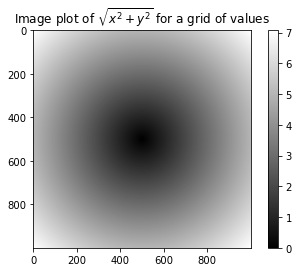

In [37]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [50]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示：

In [51]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [52]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [53]:
arr = np.random.randn(4, 4)
arr

array([[ 0.7187552 ,  0.262984  , -1.66085722,  0.10450253],
       [-0.61845194,  1.04497608,  0.16430274,  0.71578281],
       [ 0.52455875,  1.34993962, -1.39359294,  0.60313875],
       [ 1.12853864, -0.40315634, -0.09043265, -0.34022394]])

In [54]:
arr > 0

array([[ True,  True, False,  True],
       [False,  True,  True,  True],
       [ True,  True, False,  True],
       [ True, False, False, False]])

In [55]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [-2,  2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2, -2]])

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值：

In [56]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -1.66085722,  2.        ],
       [-0.61845194,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -1.39359294,  2.        ],
       [ 2.        , -0.40315634, -0.09043265, -0.34022394]])

传递给where的数组大小可以不相等，甚至可以是标量值。

### 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

这里，生成了一些正态分布随机数据，然后做了聚类统计：

In [1]:
arr = np.random.randn(5, 4)
arr

array([[-0.01736608, -0.79027843, -0.63336141, -1.26012885],
       [-0.41844201, -0.83929938, -0.73472259,  0.40032247],
       [-1.73022685, -0.64219168,  0.74410585,  2.29720075],
       [-1.07619961, -0.04840808,  0.99944692, -0.77624283],
       [-0.87424908,  0.67484351, -0.42373461,  0.8500303 ]])

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [2]:
arr.mean(axis=1)

array([-0.67528369, -0.39803538,  0.16722201, -0.2253509 ,  0.05672253])

这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：

In [3]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

在多维数组中，累加函数（如cumsum）返回的是同样大小的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类：

表4-5列出了全部的基本数组统计方法。后续章节中有很多例子都会用到这些方法。

| 方法 | 说明 |
| :--- | :--- |
| sum |对数组中全部或轴向的元素求和，零长度数组和为0 |
| mean | 算数平均数，零长度的数组的mean为NaN |
| std、var | 分别为标准差和方差，自由度可调 |
| min 、 max | 最大值和最小值 |
| argmin、argmax | 分别为最大和最小元素的索引 |
| cumsum | 所有元素的累计和 |
| cumprod | 所有元素的累计积 

### 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [4]:
arr = np.random.randn(100)
(arr > 0).sum()

54

另外还有两个方法any和all，它们对布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True：

In [5]:
bools = np.array([False, False, True, True])
bools.any()

True

In [6]:
bools.all()

False

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

### 排序

跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地排序：

In [8]:
arr = np.random.randn(6)
arr

array([ 0.57634015,  0.3964461 ,  1.16228925, -0.20868394, -0.60048374,
       -1.64065635])

In [10]:
arr.sort()
arr

array([-1.64065635, -0.60048374, -0.20868394,  0.3964461 ,  0.57634015,
        1.16228925])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：

In [11]:
arr = np.random.randn(5, 3)
arr

array([[-0.6224808 , -0.07599747, -0.79884962],
       [ 0.72265078,  2.13170985,  0.21480528],
       [ 1.40085295,  1.19892357,  1.59770429],
       [-1.35661752, -0.20231975, -0.80241938],
       [-0.82755217,  0.66398935, -1.12386393]])

In [12]:
arr.sort(1)
arr

array([[-0.79884962, -0.6224808 , -0.07599747],
       [ 0.21480528,  0.72265078,  2.13170985],
       [ 1.19892357,  1.40085295,  1.59770429],
       [-1.35661752, -0.80241938, -0.20231975],
       [-1.12386393, -0.82755217,  0.66398935]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [13]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]

-1.5427435346595202

### 唯一化以及其他的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：

In [15]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [17]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

拿跟np.unique等价的纯Python代码来对比一下：

In [18]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [19]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

NumPy中的集合函数请参见表4-6。

| 方法 | 说明
| :--- | :--- |
| unique(x) | 计算x中的唯一元素，并返回有序结果 |
| intersect1d(x, y） | 计算x和y中的公共元素，并返回有序结果 |
| union1d(x, y) | 计算x和y的并集，并返回有序结果 |
| in1d(x, y) | 得到一个表示x的元素是否包含与y的布尔型数组 |
| setdiff1d(x, y) | 集合的差，即元素在x中且不在y中 |
| setxor1d(x, y) | 集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素 

## 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。这一小节只讨论NumPy的内置二进制格式，因为更多的用户会使用pandas或其它工具加载文本或表格数据（见第6章）。

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的：

In [21]:
arr = np.arange(10)
np.save('some_array', arr)

如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。然后就可以通过np.load读取磁盘上的数组：

In [22]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可：

In [23]:
np.savez('array_archive.npz', a=arr, b=arr)

加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载：

In [24]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果要将数据压缩，可以使用numpy.savez_compressed

In [25]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。不像某些语言（如MATLAB），通过**对两个二维数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）：

In [26]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [27]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [28]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y)等价于np.dot(x, y)：

In [29]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组：

In [30]:
np.dot(x, np.ones(3))

array([ 6., 15.])

@符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法：

In [31]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的NumPy版本）等：

In [32]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 76.6071192 ,  56.08543236, -29.27372916, -47.76840517,
        -33.52736131],
       [ 56.08543236,  41.3386126 , -21.49890187, -35.12452469,
        -24.75796485],
       [-29.27372916, -21.49890187,  11.32352236,  18.2665605 ,
         12.80536742],
       [-47.76840517, -35.12452469,  18.2665605 ,  30.06766171,
         21.13890246],
       [-33.52736131, -24.75796485,  12.80536742,  21.13890246,
         15.34815505]])

In [33]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -2.45738029e-14, -9.88054600e-15,
        -1.80010001e-14,  4.56751152e-15],
       [-1.25750340e-14,  1.00000000e+00,  2.39927288e-14,
         2.87964206e-14,  2.67475266e-14],
       [ 1.96515529e-14, -3.47505910e-14,  1.00000000e+00,
        -1.37283098e-15,  6.11551990e-15],
       [ 5.36118042e-14, -1.44896864e-15, -2.01098808e-14,
         1.00000000e+00, -1.00644342e-14],
       [ 1.63024546e-14,  1.19557608e-14, -8.01383238e-15,
        -1.18528350e-14,  1.00000000e+00]])

In [34]:
q, r = qr(mat)
r

array([[-3.99367036,  1.6134997 , -4.11191311, -2.76701978,  1.12673875],
       [ 0.        , -7.82368997, -6.87123092, -4.07239837, -1.28806227],
       [ 0.        ,  0.        , -5.19186956,  4.25314559, -1.5294014 ],
       [ 0.        ,  0.        ,  0.        , -1.47259109,  2.08915837],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01967438]])

表达式X.T.dot(X)计算X和它的转置X.T的点积。

表4-7中列出了一些最常用的线性代数函数。

| 函数 | 说明 |
| :--- | :--- |
| diag | 以一维数组的形式返回方阵对角线（或非对角线）元素，或将一维数组转换为方阵 |
| dot | 矩阵乘法 |
| trace | 计算对角线元素的和 |
| det | 计算矩阵行列式 |
| eig | 计算方阵的本征值和本征向量 |
| inv | 计算方阵的逆 |
| pinv | 计算矩阵的Moore-Penrose伪逆 |
| qr | 计算QR分解 |
| svd | 计算奇异值分解 |
| solve | 解线性方程组Ax=b, 其中A为一个方阵 |
| lstsq | 计算Ax=b的最小二乘解 |

## 伪随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态分布的4×4样本数组：

In [1]:
samples = np.random.normal(size=(4,4))
samples

array([[ 1.50111183, -1.32579571,  0.04017117, -0.61855478],
       [ 0.7613957 , -0.07370488, -1.02989948, -0.35331591],
       [ 0.01018315, -1.41562476,  0.80478922,  1.07572631],
       [-0.32615289, -2.54309911,  0.16403296,  0.6028374 ]])

**而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级**：

我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [4]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [5]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

表4-8列出了numpy.random中的部分函数。在下一节中，我将给出一些利用这些函数一次性生成大量样本值的范例。